# Tree Model Comparisons
## Stephen Ronkowski

Here, I will run three Tree-based classifier models to measure their performance against a Julia-based Optimal Decision Tree model.  

In [1]:
#model imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

#data processing imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from time import time
from scipy.stats import randint

#visualization imports
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import export_graphviz

#data directory declaration
FILEDIR = "/home/sronk/Downloads/Machine_Learning_MSCA_31009/Homework/data/"


In [2]:
# Utility function to report best scores
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html
def report(results, n_top=2):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

#establish number of random searches for each model optimization
n_iter_search = 20


## Wine Dataset

In [3]:
#import wine data
df = pd.read_csv(FILEDIR + "wine.data")

#review data load
df.head()


,Label,Alcohol,Malic,Ash,Alcalinity,Magnesium,phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
#copy labels to new df, drop from original
y = df.Label.copy()
df.drop("Label", axis = 1, inplace = True)


In [5]:
#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.30, random_state=1102)


### Decision Tree

In [6]:
#load dict for Decision Tree optimization
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

#initalize model
wine_dt = DecisionTreeClassifier()

#tune model hyperparameters
wine_dt_opt = RandomizedSearchCV(wine_dt, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)


In [7]:
start = time()
wine_dt_opt.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(wine_dt_opt.cv_results_)


RandomizedSearchCV took 0.75 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.920 (std: 0.036)
Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1}

Model with rank: 2
Mean validation score: 0.918 (std: 0.038)
Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 1}



In [8]:
#score model on train set
wine_dt_opt.score(X_train, y_train)


1.0

In [9]:
#score model on test set
wine_dt_opt.score(X_test, y_test)


0.8333333333333334

In [24]:
#graph decision tree
dot_data = export_graphviz(wine_dt_opt.best_estimator_, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("wine") 


'wine.pdf'

### AdaBoost

In [10]:
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate' : [0.01,0.05,0.1,0.3,1.0],
    'random_state' : [1102]
 }

#initalize model
wine_abc = AdaBoostClassifier()

#tune model hyperparameters
wine_abc_opt = RandomizedSearchCV(wine_abc, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)


In [11]:
start = time()
wine_abc_opt.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(wine_abc_opt.cv_results_)


RandomizedSearchCV took 36.81 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.944 (std: 0.047)
Parameters: {'learning_rate': 0.05, 'n_estimators': 79, 'random_state': 1102}

Model with rank: 1
Mean validation score: 0.944 (std: 0.047)
Parameters: {'learning_rate': 0.05, 'n_estimators': 173, 'random_state': 1102}

Model with rank: 1
Mean validation score: 0.944 (std: 0.047)
Parameters: {'learning_rate': 0.05, 'n_estimators': 172, 'random_state': 1102}

Model with rank: 1
Mean validation score: 0.944 (std: 0.047)
Parameters: {'learning_rate': 0.05, 'n_estimators': 138, 'random_state': 1102}



In [12]:
#score model on train set
wine_abc_opt.score(X_train, y_train)


0.9838709677419355

In [13]:
#score model on test set
wine_abc_opt.score(X_test, y_test)


0.9259259259259259

In [26]:
.feature_importances_

array([0.13924051, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.60759494, 0.        , 0.        , 0.07594937,
       0.01265823, 0.02531646, 0.13924051])

Feature ranking:


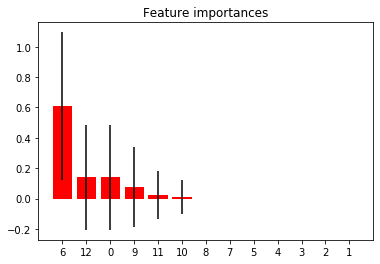

In [28]:
importances = wine_abc_opt.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in wine_abc_opt.best_estimator_.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

X = X_train

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])

plt.show()

### Random Forest

In [14]:
#load dict for Random Forest optimization
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 11),
              "min_samples_split": randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

#initalize model
wine_rf = RandomForestClassifier(n_estimators=100)

#tune model hyperparameters
wine_rf_opt = RandomizedSearchCV(wine_rf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)


In [15]:
start = time()
wine_rf_opt.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(wine_rf_opt.cv_results_)


RandomizedSearchCV took 19.26 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.976 (std: 0.020)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_split': 7}

Model with rank: 2
Mean validation score: 0.975 (std: 0.033)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_split': 6}

Model with rank: 2
Mean validation score: 0.975 (std: 0.033)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_split': 10}

Model with rank: 2
Mean validation score: 0.975 (std: 0.033)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'min_samples_split': 7}

Model with rank: 2
Mean validation score: 0.975 (std: 0.033)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 5, 'min_samples_split': 3}



In [16]:
#score model on training set
wine_rf_opt.score(X_train, y_train)


1.0

In [17]:
#score model on training set
wine_rf_opt.score(X_test, y_test)


0.9629629629629629

Feature ranking:


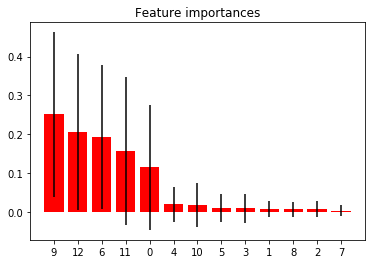

In [27]:
importances = wine_rf_opt.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in wine_rf_opt.best_estimator_.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

X = X_train

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])

plt.show()

## King-Rook Dataset

As I did in the Julia-based ODT analysis of this dataset, I will first transform the text data into indicator variables, and then begin the analysis.

In [29]:
#generate dummy column names
col_label = []
for i in np.arange(1,38):
        col_label.append("col" + str(i))

#import king-rook data
df = pd.read_csv(FILEDIR + "kr-vs-kp.data", index_col = False, header = None, names = col_label)

#review data load
df.head()


,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37
0,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won


In [30]:
#copy labels to new df, drop from original
y = df.col37.copy()
df.drop("col37", axis = 1, inplace = True)

#convert won/nowon to numerical
y = y.apply(lambda x: 1 if x == "won" else 2)

#convert features to numericals
df = df.applymap(lambda x: 1 if x == "f" else (2 if x == "l" else (3 if x == "n" else 4)))

#review converted df
df.head()


,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,4,4,3
1,1,1,1,1,4,1,1,1,1,1,...,1,1,1,1,1,1,1,4,4,3
2,1,1,1,1,4,1,4,1,1,1,...,1,1,1,1,1,1,1,4,4,3
3,1,1,1,1,1,1,1,1,4,1,...,1,1,1,1,1,1,1,4,4,3
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,4,4,3


In [31]:
#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.30, random_state=1102)


### Decision Tree 

In [32]:
#load dict for Decision Tree optimization
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

#initalize model
chess_dt = DecisionTreeClassifier()

#tune model hyperparameters
chess_dt_opt = RandomizedSearchCV(chess_dt, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)
#fit the model
start = time()
chess_dt_opt.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(chess_dt_opt.cv_results_)


RandomizedSearchCV took 0.28 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.938 (std: 0.009)
Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 2}

Model with rank: 2
Mean validation score: 0.911 (std: 0.037)
Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 4}



In [33]:
#score model on train set
chess_dt_opt.score(X_train, y_train)


0.970049172999553

In [34]:
#score model on test set
chess_dt_opt.score(X_test, y_test)


0.9416058394160584

In [35]:
#graph decision tree
dot_data = export_graphviz(chess_dt_opt.best_estimator_, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("chess") 


'chess.pdf'

### AdaBoost

In [40]:
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate' : [0.01,0.05,0.1,0.3,1.0],
    'random_state' : [1102]
 }

#initalize model
chess_abc = AdaBoostClassifier()

#tune model hyperparameters
chess_abc_opt = RandomizedSearchCV(chess_abc, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)

#fit the model
start = time()
chess_abc_opt.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(chess_abc_opt.cv_results_)


RandomizedSearchCV took 16.63 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.959 (std: 0.007)
Parameters: {'learning_rate': 1.0, 'n_estimators': 172, 'random_state': 1102}

Model with rank: 2
Mean validation score: 0.958 (std: 0.007)
Parameters: {'learning_rate': 1.0, 'n_estimators': 162, 'random_state': 1102}



In [41]:
#score model on train set
chess_abc_opt.score(X_train, y_train)


0.9628967367009388

In [42]:
#score model on test set
chess_abc_opt.score(X_test, y_test)


0.9635036496350365

Feature ranking:


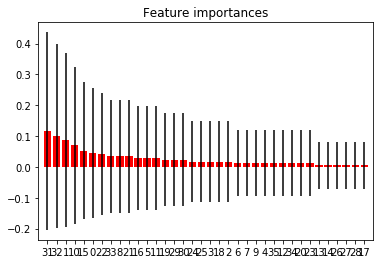

In [43]:
importances = chess_abc_opt.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in chess_abc_opt.best_estimator_.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

X = X_train

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])

plt.show()

### Random Forest

In [36]:
#load dict for Random Forest optimization
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 11),
              "min_samples_split": randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

#initalize model
chess_rf = RandomForestClassifier(n_estimators=100)

#tune model hyperparameters
chess_rf_opt = RandomizedSearchCV(chess_rf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)
#fit the model
start = time()
chess_rf_opt.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(chess_rf_opt.cv_results_)


RandomizedSearchCV took 13.43 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.983 (std: 0.003)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 8, 'min_samples_split': 4}

Model with rank: 2
Mean validation score: 0.983 (std: 0.004)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'min_samples_split': 6}



In [37]:
#score model on train set
chess_rf_opt.score(X_train, y_train)


0.9973178363880196

In [38]:
#score model on test set
chess_rf_opt.score(X_test, y_test)


0.9843587069864442

Feature ranking:


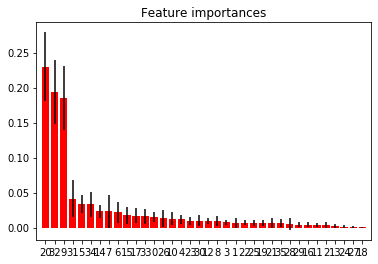

In [45]:
importances = chess_rf_opt.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in chess_rf_opt.best_estimator_.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

X = X_train

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])

plt.show()

## Contraceptive Method Choice Dataset

In [46]:
#generate dummy column names
col_label = []
for i in np.arange(1,11):
        col_label.append("col" + str(i))

#import king-rook data
df = pd.read_csv(FILEDIR + "cmc.data", index_col = False, header = None, names = col_label)

#review data load
df.head()


,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [47]:
#copy labels to new df, drop from original
y = df.col10.copy()
df.drop("col10", axis = 1, inplace = True)

#review converted df
df.head()


,col1,col2,col3,col4,col5,col6,col7,col8,col9
0,24,2,3,3,1,1,2,3,0
1,45,1,3,10,1,1,3,4,0
2,43,2,3,7,1,1,3,4,0
3,42,3,2,9,1,1,3,3,0
4,36,3,3,8,1,1,3,2,0


In [48]:
#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.30, random_state=1102)


### Decision Tree

In [49]:
#load dict for Decision Tree optimization
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

#initalize model
choice_dt = DecisionTreeClassifier()

#tune model hyperparameters
choice_dt_opt = RandomizedSearchCV(choice_dt, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)
#fit the model
start = time()
choice_dt_opt.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(choice_dt_opt.cv_results_)


RandomizedSearchCV took 0.26 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.535 (std: 0.018)
Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 4}

Model with rank: 2
Mean validation score: 0.519 (std: 0.009)
Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 3}



In [50]:
#score model on train set
choice_dt_opt.score(X_train, y_train)


0.510184287099903

In [51]:
#score model on test set
choice_dt_opt.score(X_test, y_test)


0.48868778280542985

In [52]:
#graph decision tree
dot_data = export_graphviz(choice_dt_opt.best_estimator_, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("choice") 


'choice.pdf'

### AdaBoost

In [57]:
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate' : [0.01,0.05,0.1,0.3,1.0],
    'random_state' : [1102]
 }

#initalize model
choice_abc = AdaBoostClassifier()

#tune model hyperparameters
choice_abc_opt = RandomizedSearchCV(choice_abc, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)

#fit the model
start = time()
choice_abc_opt.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(choice_abc_opt.cv_results_)


RandomizedSearchCV took 15.44 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.557 (std: 0.022)
Parameters: {'learning_rate': 0.3, 'n_estimators': 107, 'random_state': 1102}

Model with rank: 2
Mean validation score: 0.556 (std: 0.019)
Parameters: {'learning_rate': 0.3, 'n_estimators': 51, 'random_state': 1102}



In [58]:
#score model on train set
choice_abc_opt.score(X_train, y_train)


0.5848690591658584

In [59]:
#score model on test set
choice_abc_opt.score(X_test, y_test)


0.5610859728506787

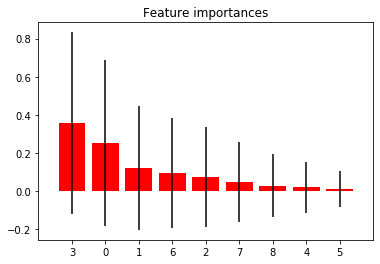

In [60]:
importances = choice_abc_opt.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in choice_abc_opt.best_estimator_.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

X = X_train

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])

plt.show()


### Random Forest

In [53]:
#load dict for Random Forest optimization
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_split": randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

#initalize model
choice_rf = RandomForestClassifier(n_estimators=100)

#tune model hyperparameters
choice_rf_opt = RandomizedSearchCV(choice_rf, param_distributions=param_dist,
                                   n_iter=n_iter_search, cv=5, iid=False)
#fit the model
start = time()
choice_rf_opt.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(choice_rf_opt.cv_results_)


RandomizedSearchCV took 10.97 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.558 (std: 0.027)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_split': 3}

Model with rank: 2
Mean validation score: 0.555 (std: 0.019)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_split': 6}



In [54]:
#score model on train set
choice_rf_opt.score(X_train, y_train)


0.965082444228904

In [55]:
#score model on test set
choice_rf_opt.score(X_test, y_test)


0.5361990950226244

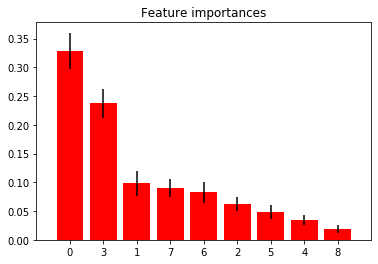

In [56]:
importances = choice_rf_opt.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in choice_rf_opt.best_estimator_.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

X = X_train

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])

plt.show()
